In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('../data/extracted_features_dataset.csv')

data.head()

,Season,HomeTeam,AwayTeam,FTR,HomeTeamPointsPGAtHomeAgainstOpponent,AwayTeamPointsPGOnAwayAgainstOpponent,HomeTeamPointsPGOverallAgainstOpponent,AwayTeamPointsPGOverallAgainstOpponent,HomeTeamGoalsScoredPGAtHomeAgainstOpponent,AwayTeamGoalsScoredPGOnAwayAgainstOpponent,...,AwayTeamShotsPGOverall,AwayTeamFoulsPGOnAway,AwayTeamFoulsPGOverall,AwayTeamCornersPGOnAway,AwayTeamCornersPGOverall,AwayTeamYellowCardsPGOnAway,AwayTeamYellowCardsPGOverall,AwayTeamRedCardsPGOnAway,AwayTeamRedCardsPGOverall,AwayTeam_finish
0,2001-02,Charlton,Everton,A,3.0,0.0,1.5,1.5,1.0,0.0,...,10.368421,15.368421,14.684211,4.894737,5.342105,1.947368,1.947368,0.157895,0.131579,16.0
1,2001-02,Derby,Blackburn,H,0.0,0.0,0.0,0.0,0.0,0.0,...,11.427875,11.215584,12.465174,3.798498,4.838199,1.709194,1.632898,0.056477,0.110397,15.0
2,2001-02,Leeds,Southampton,H,3.0,0.0,1.5,1.5,2.0,0.0,...,10.894737,13.842105,13.394737,5.052632,5.552632,1.315789,1.289474,0.000000,0.026316,10.0
3,2001-02,Leicester,Bolton,A,0.0,0.0,0.0,0.0,0.0,0.0,...,10.011921,13.094710,11.817898,4.730377,4.945577,1.797705,1.774756,0.050147,0.114634,15.0
4,2001-02,Liverpool,West Ham,H,3.0,0.0,2.0,0.5,3.0,0.0,...,12.500000,11.052632,12.447368,5.157895,5.605263,1.842105,1.815789,0.052632,0.078947,15.0


In [4]:
data.columns


Index(['Season', 'HomeTeam', 'AwayTeam', 'FTR',
       'HomeTeamPointsPGAtHomeAgainstOpponent',
       'AwayTeamPointsPGOnAwayAgainstOpponent',
       'HomeTeamPointsPGOverallAgainstOpponent',
       'AwayTeamPointsPGOverallAgainstOpponent',
       'HomeTeamGoalsScoredPGAtHomeAgainstOpponent',
       'AwayTeamGoalsScoredPGOnAwayAgainstOpponent',
       'HomeTeamGoalsScoredPGOverallAgainstOpponent',
       'AwayTeamGoalsScoredPGOverallAgainstOpponent',
       'HomeTeamShotsPGAtHomeAgainstOpponent',
       'AwayTeamShotsPGOnAwayAgainstOpponent',
       'HomeTeamShotsPGOverallAgainstOpponent',
       'AwayTeamShotsPGOverallAgainstOpponent',
       'HomeTeamFoulsPGAtHomeAgainstOpponent',
       'AwayTeamFoulsPGOnAwayAgainstOpponent',
       'HomeTeamFoulsPGOverallAgainstOpponent',
       'AwayTeamFoulsPGOverallAgainstOpponent',
       'HomeTeamCornersPGAtHomeAgainstOpponent',
       'AwayTeamCornersPGOnAwayAgainstOpponent',
       'HomeTeamCornersPGOverallAgainstOpponent',
       'AwayTeam

In [5]:
columns_to_normalise = data.columns.difference(['Season', 'HomeTeam', 'AwayTeam', 'FTR'])

data[columns_to_normalise] = data[columns_to_normalise].apply(lambda x: (x - x.mean()) / x.std())

Target variable encoding:
A: 0
D: 1
H: 2


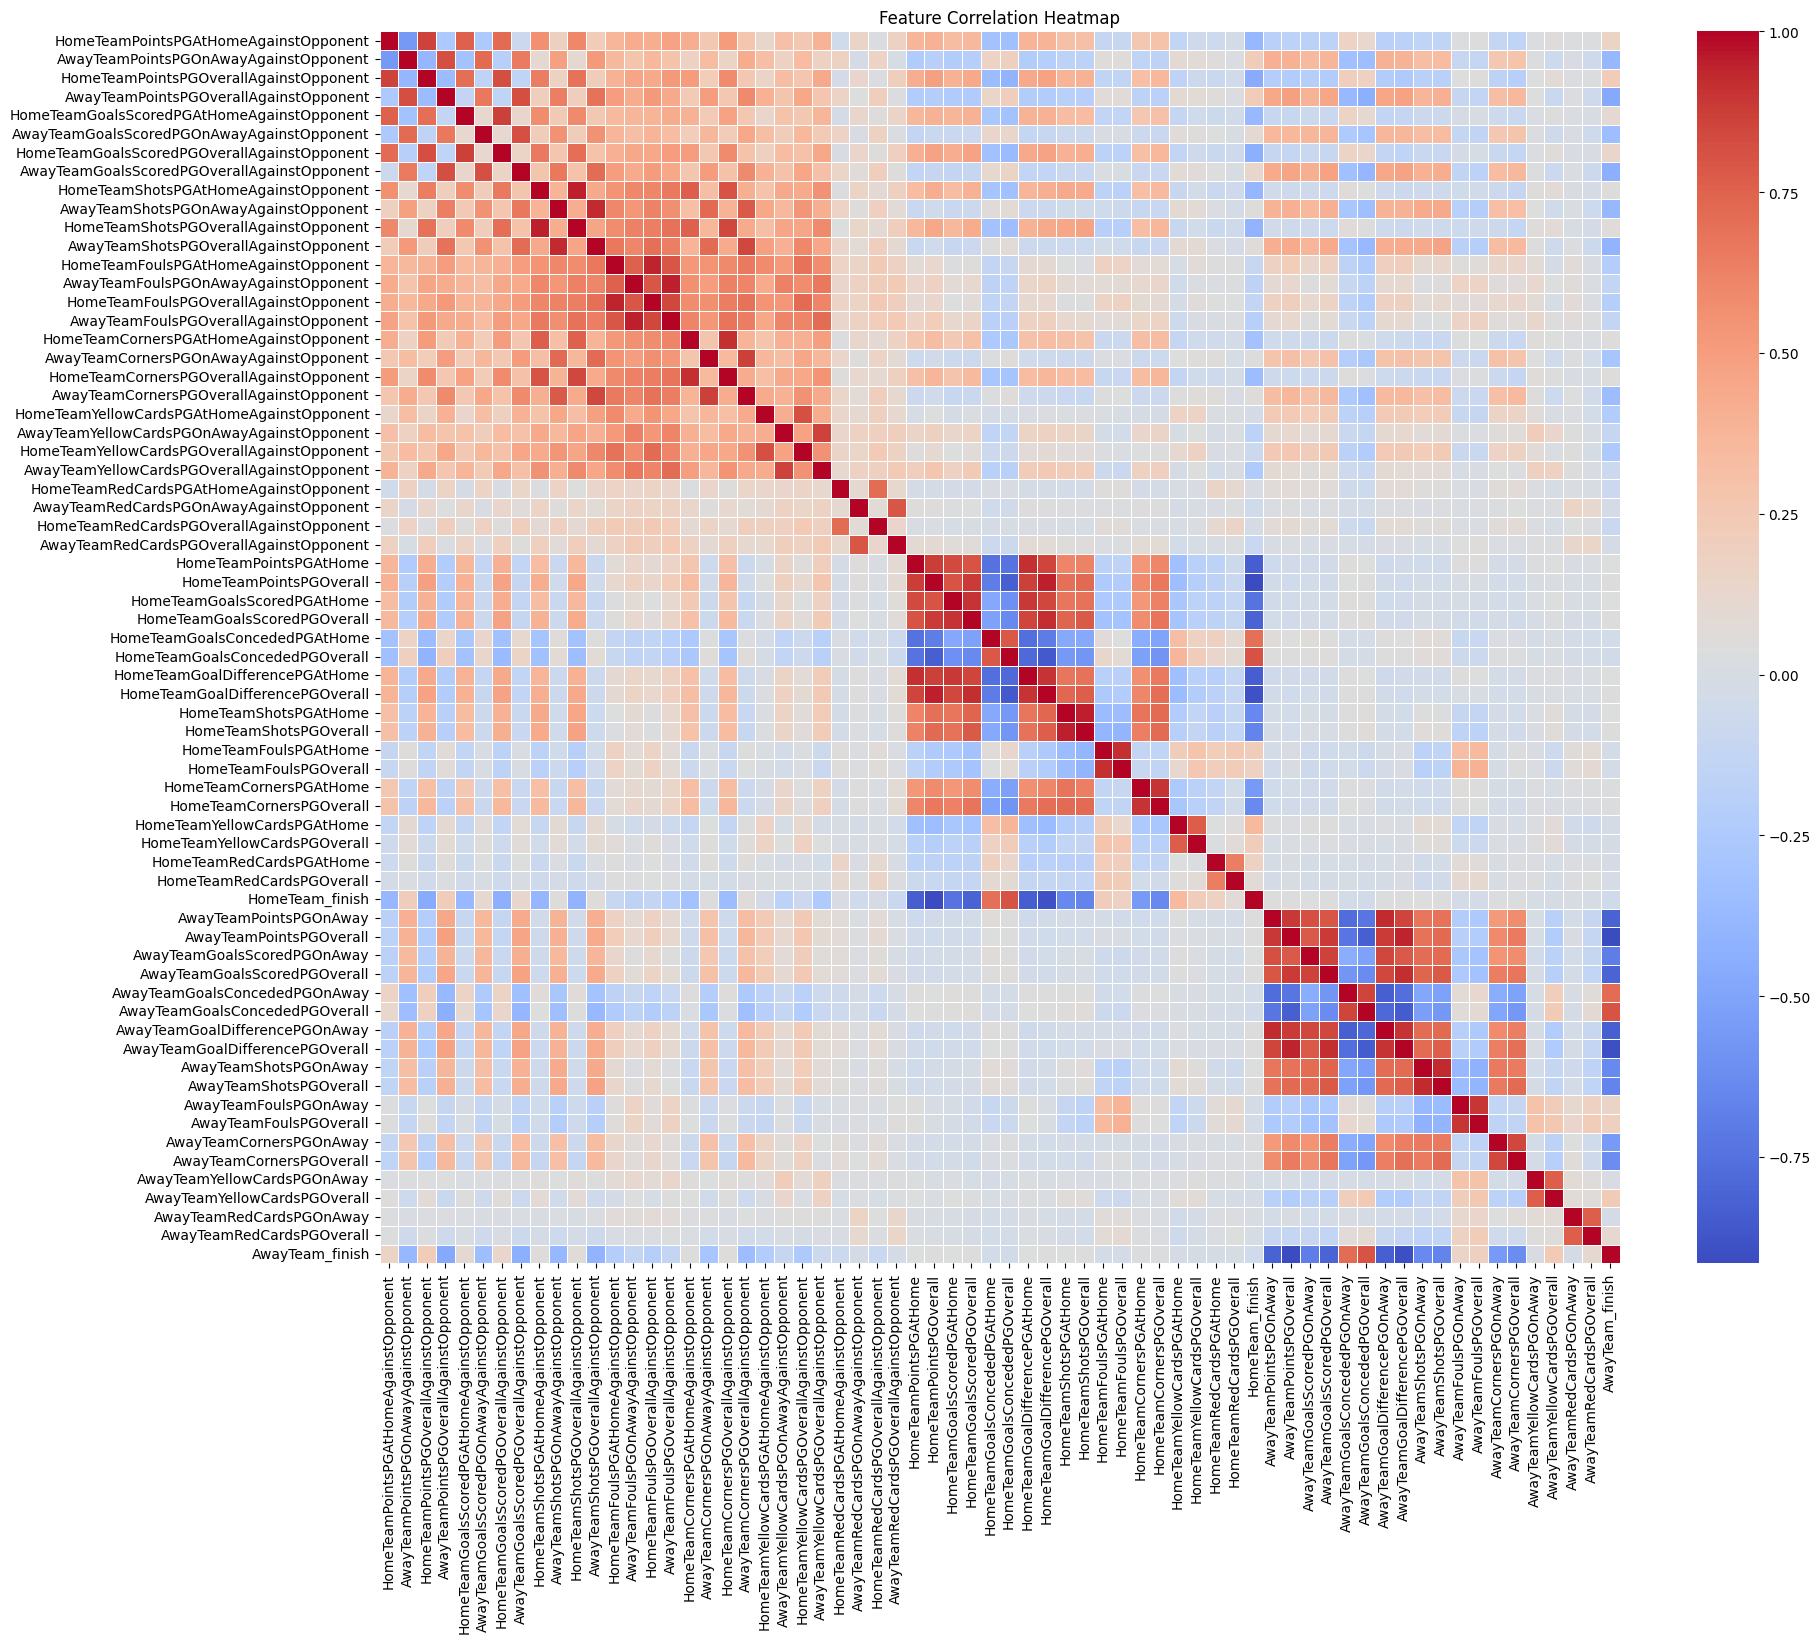

Highly correlated feature pairs:
HomeTeamPointsPGAtHomeAgainstOpponent and HomeTeamPointsPGOverallAgainstOpponent: 0.87
AwayTeamPointsPGOnAwayAgainstOpponent and AwayTeamPointsPGOverallAgainstOpponent: 0.82
HomeTeamPointsPGOverallAgainstOpponent and HomeTeamGoalsScoredPGOverallAgainstOpponent: 0.82
AwayTeamPointsPGOverallAgainstOpponent and AwayTeamGoalsScoredPGOverallAgainstOpponent: 0.82
HomeTeamGoalsScoredPGAtHomeAgainstOpponent and HomeTeamGoalsScoredPGOverallAgainstOpponent: 0.87
AwayTeamGoalsScoredPGOnAwayAgainstOpponent and AwayTeamGoalsScoredPGOverallAgainstOpponent: 0.81
HomeTeamShotsPGAtHomeAgainstOpponent and HomeTeamShotsPGOverallAgainstOpponent: 0.95
HomeTeamShotsPGAtHomeAgainstOpponent and HomeTeamCornersPGOverallAgainstOpponent: 0.81
AwayTeamShotsPGOnAwayAgainstOpponent and AwayTeamShotsPGOverallAgainstOpponent: 0.93
HomeTeamShotsPGOverallAgainstOpponent and HomeTeamCornersPGOverallAgainstOpponent: 0.85
AwayTeamShotsPGOverallAgainstOpponent and AwayTeamCornersPGOverallAg

In [6]:
X = data.drop(['FTR', 'Season', 'HomeTeam', 'AwayTeam'], axis=1)
y = data['FTR']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Target variable encoding:")
for i, category in enumerate(le.classes_):
    print(f"{category}: {i}")

# 2. Correlation analysis
correlation_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify highly correlated features
threshold = 0.8  # You can adjust this
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("Highly correlated feature pairs:")
for feat1, feat2 in high_corr_features:
    print(f"{feat1} and {feat2}: {correlation_matrix.loc[feat1, feat2]:.2f}")

There is far too many features to get any useful information from this..., lets try a basic model to extract useful features.

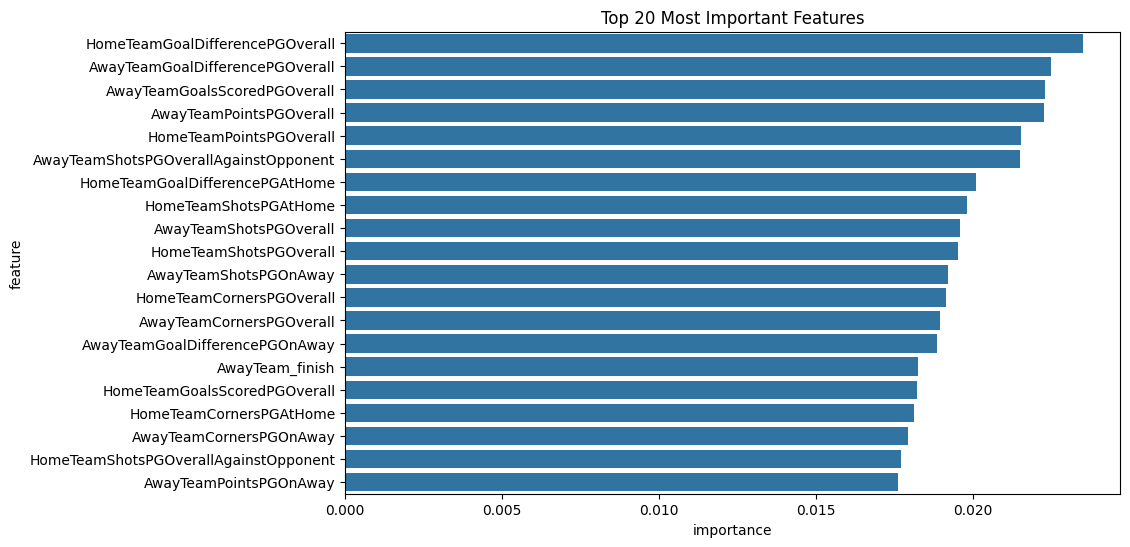

Top 10 most important features:
                                  feature  importance
35        HomeTeamGoalDifferencePGOverall    0.023517
54        AwayTeamGoalDifferencePGOverall    0.022491
50           AwayTeamGoalsScoredPGOverall    0.022283
48                AwayTeamPointsPGOverall    0.022277
29                HomeTeamPointsPGOverall    0.021526
11  AwayTeamShotsPGOverallAgainstOpponent    0.021492
34         HomeTeamGoalDifferencePGAtHome    0.020087
36                  HomeTeamShotsPGAtHome    0.019798
56                 AwayTeamShotsPGOverall    0.019595
37                 HomeTeamShotsPGOverall    0.019516


In [7]:
# 3. Feature importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y_encoded)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.show()

print("Top 10 most important features:")
print(feature_importance.head(10))

Top 10 features by importance:
                                  feature  importance  cumulative_importance
35        HomeTeamGoalDifferencePGOverall    0.023517               0.023517
54        AwayTeamGoalDifferencePGOverall    0.022491               0.046008
50           AwayTeamGoalsScoredPGOverall    0.022283               0.068291
48                AwayTeamPointsPGOverall    0.022277               0.090568
29                HomeTeamPointsPGOverall    0.021526               0.112094
11  AwayTeamShotsPGOverallAgainstOpponent    0.021492               0.133586
34         HomeTeamGoalDifferencePGAtHome    0.020087               0.153674
36                  HomeTeamShotsPGAtHome    0.019798               0.173471
56                 AwayTeamShotsPGOverall    0.019595               0.193066
37                 HomeTeamShotsPGOverall    0.019516               0.212582

Number of features accounting for 80% of importance: 45

Number of features with >1% importance: 57
These features are:
[

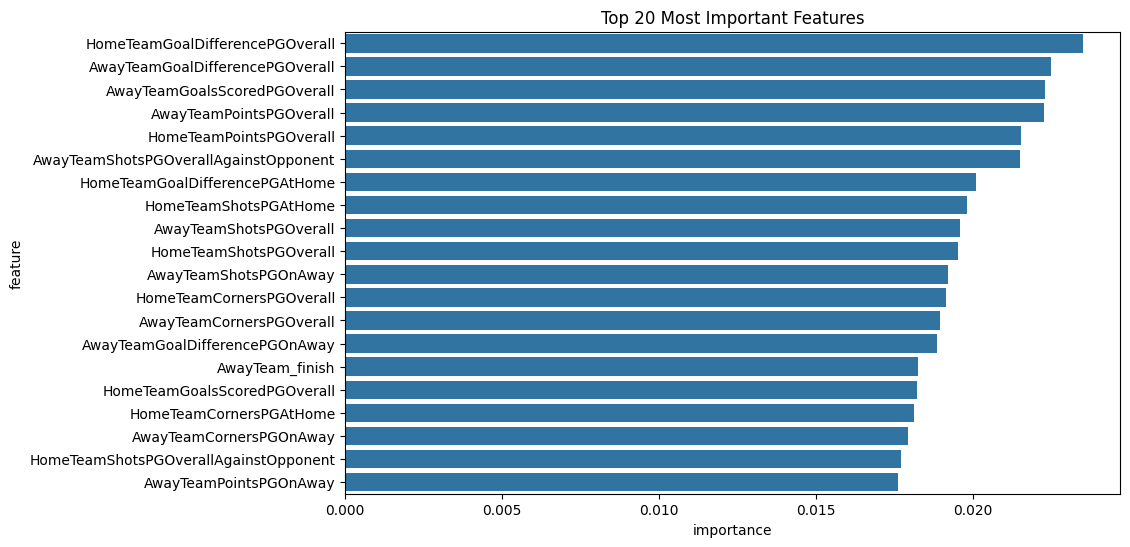

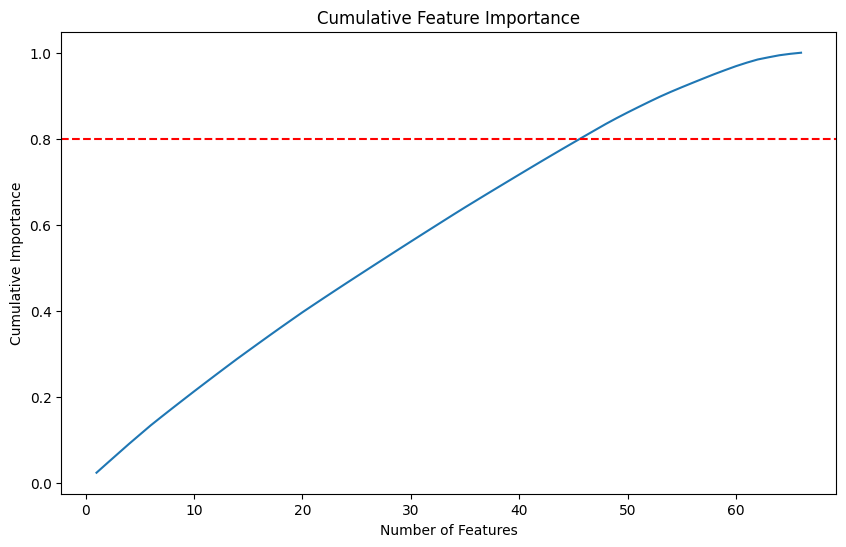

In [8]:
# Assuming you've already run the Random Forest and obtained feature_importance DataFrame

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Print top 10 features
print("Top 10 features by importance:")
print(feature_importance.head(10))

# Find number of features for 80% cumulative importance
features_for_80 = feature_importance[feature_importance['cumulative_importance'] <= 0.8].shape[0]
print(f"\nNumber of features accounting for 80% of importance: {features_for_80}")

# Identify features above 1% importance
important_features = feature_importance[feature_importance['importance'] > 0.01]
print(f"\nNumber of features with >1% importance: {important_features.shape[0]}")
print("These features are:")
print(important_features['feature'].tolist())

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.show()

# Visualize cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_importance) + 1), feature_importance['cumulative_importance'])
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()

In [9]:
key_words = [
    'PointsPG',
    'GoalDifferencePG',
    'GoalsScoredPG',
    'GoalsConcededPG',
    'ShotsPG',
    'FoulsPG',
    'CornersPG',
    'YellowCardsPG',
    'RedCardsPG',
    'FinishingPosition'
]

key_word_importances_seasonal = {}
key_word_importances_opponent = {}
for word in key_words:
    importances_seasonal = feature_importance[feature_importance['feature'].str.contains(word) & ~(feature_importance['feature'].str.contains('Opponent'))]
    key_word_importance_seasonal = importances_seasonal['importance'].abs().sum()
    key_word_importances_seasonal[word + 'Seasonal'] = key_word_importance_seasonal

    importances_opponent = feature_importance[feature_importance['feature'].str.contains(word) & (feature_importance['feature'].str.contains('Opponent'))]
    key_word_importance_opponent = importances_opponent['importance'].abs().sum()
    key_word_importances_opponent[word + 'Opponent'] = key_word_importance_opponent

# Convert the dictionary to a pandas Series and sort it
sorted_importances_seasonal = pd.Series(key_word_importances_seasonal).sort_values(ascending=False)
sorted_importances_opponent = pd.Series(key_word_importances_opponent).sort_values(ascending=False)

# Print the sorted Series
print(sorted_importances_seasonal)
print("\n\n")
print(sorted_importances_opponent)

GoalDifferencePGSeasonal     0.084955
ShotsPGSeasonal              0.078122
PointsPGSeasonal             0.077089
CornersPGSeasonal            0.074127
GoalsScoredPGSeasonal        0.072452
FoulsPGSeasonal              0.064386
YellowCardsPGSeasonal        0.063907
GoalsConcededPGSeasonal      0.062686
RedCardsPGSeasonal           0.042288
FinishingPositionSeasonal    0.000000
dtype: float64



ShotsPGOpponent              0.069538
FoulsPGOpponent              0.061722
CornersPGOpponent            0.059683
YellowCardsPGOpponent        0.049918
GoalsScoredPGOpponent        0.049363
PointsPGOpponent             0.040388
RedCardsPGOpponent           0.015729
GoalDifferencePGOpponent     0.000000
GoalsConcededPGOpponent      0.000000
FinishingPositionOpponent    0.000000
dtype: float64


Things to note:
- Seasonal features are more important than opponent features.
---
- GoalDifference is the most important seasonal feature, followed by shots and then points.
- Corners are suprisingly important, though maybe its more representative of shots being important than anything, as more shots often lead to more corners.
- Suprisingly, goals conceded is of somewhat little importance (when compared to other seasonal features). Considering the phrase "goals win games, defence wins championships", this is quite suprising, I would have expected it to be more important.
  - That being said, as per my original thought, it seems goal difference could act for both goals scored and goals conceded. Does this mean its importance is being overestimated? or the others are being redundant.
- As I thought may be the case, fouls, yellow and red cards are not very important. This is probably because they are more representative of a team's style of play rather than being indicative of a team's performance, and tactical fouling is a thing...
---
- Against opponent features, the most important ones are shots and fouls, followed by corners and yellow cards.
- Interestingly, with the exception of shots, this is completely different to seasonal features.
  - Wondering if this suggests that style of play is more important than general team quality when it comes to head-to-head results.

- Finishing position has no importance at all?? This is probably an error in my code.
  - Need to check this.
  - note - 0 importance features against opponent are just because they are not being calculated for the opponent.

In [37]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X is your feature matrix and y is your target variable
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

feature_importance_scores = np.zeros(X.shape[1])
feature_selection_frequency = np.zeros(X.shape[1])

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    # Perform feature selection
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    selector = SelectFromModel(rf, prefit=False)
    rf.fit(X_train, y_train)
    selector.fit(X_train, y_train)
    
    # Record which features were selected
    feature_selection_frequency += selector.get_support()
    
    # Record feature importance scores
    feature_importance_scores += rf.feature_importances_

from sklearn.metrics import accuracy_score

# Initialize a list to store accuracy scores
accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f"Average accuracy over {n_splits} folds: {average_accuracy:.4f}")


# Average the scores and frequencies
feature_importance_scores /= n_splits
feature_selection_frequency /= n_splits

# Create a DataFrame with the results
feature_selection_results = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance_scores,
    'selection_frequency': feature_selection_frequency
}).sort_values('importance', ascending=False)

print("Top 20 features by cross-validated importance:")
print(feature_selection_results.head(20))

Average accuracy over 5 folds: 0.5116
Top 20 features by cross-validated importance:
                                  feature  importance  selection_frequency
35        HomeTeamGoalDifferencePGOverall    0.023796                  1.0
54        AwayTeamGoalDifferencePGOverall    0.022223                  1.0
50           AwayTeamGoalsScoredPGOverall    0.022126                  1.0
48                AwayTeamPointsPGOverall    0.021678                  1.0
29                HomeTeamPointsPGOverall    0.020793                  1.0
56                 AwayTeamShotsPGOverall    0.020459                  1.0
11  AwayTeamShotsPGOverallAgainstOpponent    0.020174                  1.0
34         HomeTeamGoalDifferencePGAtHome    0.019882                  1.0
31           HomeTeamGoalsScoredPGOverall    0.019686                  1.0
37                 HomeTeamShotsPGOverall    0.019563                  1.0
36                  HomeTeamShotsPGAtHome    0.019541                  1.0
60             

# Feature elimination

We are going to eliminate features that are not important both in terms of results and intuition.

- seasonal:
  - Yellow and red cards are not super important.
  - Fouls are not very important.
  - While goals conceded is supposedly not super important, I think this is moreso down to the results provided by rf.feature_importance, I am going to veto this and keep it in for now.
  - Later I also want to experiment with no goal difference, and just use goals scored and conceded.
- Opponent:
  - red and yellow cards are not super important
  - nor is points (although i guess goals/shots can represent this fairly well)
  - I am going to veto this and keep points in for now though.

In [36]:
data.head()

,Season,HomeTeam,AwayTeam,FTR,HomeTeamPointsPGAtHomeAgainstOpponent,AwayTeamPointsPGOnAwayAgainstOpponent,HomeTeamPointsPGOverallAgainstOpponent,AwayTeamPointsPGOverallAgainstOpponent,HomeTeamGoalsScoredPGAtHomeAgainstOpponent,AwayTeamGoalsScoredPGOnAwayAgainstOpponent,...,AwayTeamShotsPGOverall,AwayTeamFoulsPGOnAway,AwayTeamFoulsPGOverall,AwayTeamCornersPGOnAway,AwayTeamCornersPGOverall,AwayTeamYellowCardsPGOnAway,AwayTeamYellowCardsPGOverall,AwayTeamRedCardsPGOnAway,AwayTeamRedCardsPGOverall,AwayTeam_finish
0,2001-02,Charlton,Everton,A,1.416252,-0.947611,0.364898,0.377707,-0.291525,-1.082516,...,-0.808118,2.209354,2.138106,0.094030,-0.149560,0.652412,1.435630,1.071697,1.238245,1.040696
1,2001-02,Derby,Blackburn,H,-1.271735,-0.947611,-1.382357,-1.376022,-1.224616,-1.082516,...,-0.318423,-0.459204,0.570797,-1.190056,-0.739222,-0.073158,0.238490,-0.494700,0.759470,0.858923
2,2001-02,Leeds,Southampton,H,1.416252,-0.947611,0.364898,0.377707,0.641567,-1.082516,...,-0.564847,1.228564,1.227349,0.278981,0.096794,-1.271623,-1.068874,-1.366985,-1.141019,-0.049942
3,2001-02,Leicester,Bolton,A,-1.271735,-0.947611,-1.382357,-1.376022,-1.224616,-1.082516,...,-0.972897,0.748298,0.113625,-0.098494,-0.613570,0.196480,0.778519,-0.592462,0.855235,0.858923
4,2001-02,Liverpool,West Ham,H,1.416252,-0.947611,0.947317,-0.791446,1.574658,-1.082516,...,0.177129,-0.563915,0.558221,0.402281,0.158382,0.331740,0.934729,-0.554091,0.048613,0.858923


In [38]:
data_with_30_most_important_features = data[['HomeTeam', 'AwayTeam', 'FTR'] + feature_selection_results['feature'].tolist()[:30]]
data_with_30_most_important_features = pd.get_dummies(data_with_30_most_important_features, columns=['HomeTeam', 'AwayTeam'])
data_with_30_most_important_features.shape

(7909, 115)

In [45]:
# Based on a mixture of feature importance and intuition:
data_with_removals = data.drop(columns=[
    'HomeTeamYellowCardsPGAtHome',
    'HomeTeamYellowCardsPGOverall',
    'AwayTeamYellowCardsPGOnAway',
    'AwayTeamYellowCardsPGOverall',
    'HomeTeamRedCardsPGAtHome',
    'HomeTeamRedCardsPGOverall',
    'AwayTeamRedCardsPGOnAway',
    'AwayTeamRedCardsPGOverall',
    'HomeTeamFoulsPGAtHome',
    'HomeTeamFoulsPGOverall',
    'AwayTeamFoulsPGOnAway',
    'AwayTeamFoulsPGOverall',

    'HomeTeamYellowCardsPGAtHomeAgainstOpponent',
    'HomeTeamYellowCardsPGOverallAgainstOpponent',
    'AwayTeamYellowCardsPGOnAwayAgainstOpponent',
    'AwayTeamYellowCardsPGOverallAgainstOpponent',
])
data_with_removals.shape

(7909, 54)

In [46]:
data_with_seasonal_features_only = data_with_removals.loc[:, ~data_with_removals.columns.str.contains('Opponent')].drop(columns=['Season'])
data_with_seasonal_features_only = pd.get_dummies(data_with_seasonal_features_only, columns=['HomeTeam', 'AwayTeam'])
data_with_seasonal_features_only.shape

(7909, 111)

In [47]:
data_minus_gd = data_with_removals.drop(columns=data_with_removals.columns[data_with_removals.columns.str.contains('GoalDifferencePG')].tolist() + ['Season'])
data_minus_gd = pd.get_dummies(data_minus_gd, columns=['HomeTeam', 'AwayTeam'])
data_minus_gd.shape

(7909, 131)

In [48]:
promoted_teams = pd.read_csv("../data/promoted_teams.csv")

data_without_promoted_teams = data_with_removals[~data_with_removals.apply(lambda row: (row['HomeTeam'] in promoted_teams['Team'].values and row['Season'] in promoted_teams[promoted_teams['Team'] == row['HomeTeam']]['Season'].values) or (row['AwayTeam'] in promoted_teams['Team'].values and row['Season'] in promoted_teams[promoted_teams['Team'] == row['AwayTeam']]['Season'].values), axis=1)]
data_without_promoted_teams = pd.get_dummies(data_without_promoted_teams, columns=['HomeTeam', 'AwayTeam']).drop(columns=['Season'])
data_without_promoted_teams.shape

(5660, 129)

In [50]:
data_with_removals_encoded = pd.get_dummies(data_with_removals, columns=['HomeTeam', 'AwayTeam']).drop(columns=['Season'])
data_with_removals_encoded.shape

(7909, 135)

In [55]:
data_with_30_most_important_features.to_csv('../preprocessed_data/data_with_30_most_important_features.csv', index=False)
data_with_seasonal_features_only.to_csv('../preprocessed_data/data_with_seasonal_features_only.csv', index=False)
data_minus_gd.to_csv('../preprocessed_data/data_minus_gd.csv', index=False)
data_without_promoted_teams.to_csv('../preprocessed_data/data_without_promoted_teams.csv', index=False)
data_with_removals_encoded.to_csv('../preprocessed_data/data_with_removals_encoded.csv', index=False)